In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import statistics as stat

matches = pd.read_csv(r"C:\Users\HP\Documents\Rgu Python\matches.csv")
print(matches)

     Day Month    Training  Injuries  OppPtsDiff  RedCards Venue  Temp  Rain  \
0    Sat   Jan    4hr 0min         0         -11         0  Home   3.3   0.6   
1    Wed   Jan   4hr 45min         1         -19         0  Away   8.4   4.4   
2    Sat   Mar  14hr 45min         1          20         1  Away  12.6   3.5   
3    Sat   Sep  13hr 30min         1          20         1  Away   5.6   0.7   
4    Wed   Apr   8hr 15min         2          11         0  Away  12.1   4.8   
..   ...   ...         ...       ...         ...       ...   ...   ...   ...   
200  Sat   Jan   3hr 30min         2          -5         0  Home   7.5   2.0   
201  Wed   Oct         NaN         0           3         1  Away  18.0   1.2   
202  Wed   May  10hr 30min         1         -14         0  Away  10.8   5.9   
203  Wed   Apr   9hr 15min         1           7         0  Home  16.2   0.2   
204  Wed   Mar   5hr 15min         1          -4         0  Home   6.6   1.0   

     Wind Snow Possession KickOff  Supp

#1.Creating a script that will identify, and either remove rows that contain missing data from the matches DataFrame, or alternatively fill any missing values with a suitable value.

In [2]:
matches.isnull().sum()

Day           0
Month         0
Training      5
Injuries      0
OppPtsDiff    0
RedCards      0
Venue         0
Temp          0
Rain          0
Wind          0
Snow          0
Possession    5
KickOff       0
Supporters    0
Result        0
dtype: int64

The output reveals the Training and Possession column each contains 5 missing values. The rows with the missing values will be dropped from the dataframe.

In [3]:
matches.dropna(inplace=True)
matches

,Day,Month,Training,Injuries,OppPtsDiff,RedCards,Venue,Temp,Rain,Wind,Snow,Possession,KickOff,Supporters,Result
0,Sat,Jan,4hr 0min,0,-11,0,Home,3.3,0.6,8.0,No,45.60%,12:30,10845,Win
1,Wed,Jan,4hr 45min,1,-19,0,Away,8.4,4.4,1.7,No,36%,18:00,6846,Lose
2,Sat,Mar,14hr 45min,1,20,1,Away,12.6,3.5,5.8,No,54.20%,12:30,11456,Draw
3,Sat,Sep,13hr 30min,1,20,1,Away,5.6,0.7,18.0,No,36.10%,19:00,10336,Draw
4,Wed,Apr,8hr 15min,2,11,0,Away,12.1,4.8,9.8,No,46.50%,17:30,9266,Lose
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,Wed,Nov,3hr 30min,0,-13,1,Away,10.4,2.5,7.3,No,42.40%,19:30,6759,Lose
200,Sat,Jan,3hr 30min,2,-5,0,Home,7.5,2.0,4.5,Yes,50.60%,15:00,11782,Lose
202,Wed,May,10hr 30min,1,-14,0,Away,10.8,5.9,14.6,No,55.80%,20:00,6915,Win
203,Wed,Apr,9hr 15min,1,7,0,Home,16.2,0.2,8.9,No,47%,18:00,12339,Draw


In [4]:
matches.isnull().values.any()

False

The rows with missing values in the matches dataframe has been deleted and the number of rows reduced from 205 to 198. The above script confirms that they are no missing values in the matches dataframe.

#1b. Checking our Dataframe to see if there are any duplicate rows and removing them.

In [5]:
matches.duplicated().sum()
matches.drop_duplicates(inplace = True)

In [6]:
matches.duplicated().sum()

0

5 rows had duplicated value, the drop_duplicates() command was passed and there are 0 duplicate rows as displayed by the above code. 

#2 creating a python script that will convert values in the Possession column from percentage to numerical format.

In [7]:
matches['Possession'] = matches['Possession'].str.replace('%', '').astype(float)
matches.head()

,Day,Month,Training,Injuries,OppPtsDiff,RedCards,Venue,Temp,Rain,Wind,Snow,Possession,KickOff,Supporters,Result
0,Sat,Jan,4hr 0min,0,-11,0,Home,3.3,0.6,8.0,No,45.6,12:30,10845,Win
1,Wed,Jan,4hr 45min,1,-19,0,Away,8.4,4.4,1.7,No,36.0,18:00,6846,Lose
2,Sat,Mar,14hr 45min,1,20,1,Away,12.6,3.5,5.8,No,54.2,12:30,11456,Draw
3,Sat,Sep,13hr 30min,1,20,1,Away,5.6,0.7,18.0,No,36.1,19:00,10336,Draw
4,Wed,Apr,8hr 15min,2,11,0,Away,12.1,4.8,9.8,No,46.5,17:30,9266,Lose


#2b Python script to convert the Training column in text into numerical format containing just number of hours

In [8]:
matches['Training'] = matches['Training'].str.replace(' ', '').str.replace('hr', "'").str.replace('min', '')
T2 = matches['Training'].str.split("'", expand = True)
T3 = T2.astype(float)
T3.columns = ['hr', 'min']
Training_new = T3['hr'] + T3['min']/60
matches = matches.assign(Training = Training_new)
matches.head()

,Day,Month,Training,Injuries,OppPtsDiff,RedCards,Venue,Temp,Rain,Wind,Snow,Possession,KickOff,Supporters,Result
0,Sat,Jan,4.00,0,-11,0,Home,3.3,0.6,8.0,No,45.6,12:30,10845,Win
1,Wed,Jan,4.75,1,-19,0,Away,8.4,4.4,1.7,No,36.0,18:00,6846,Lose
2,Sat,Mar,14.75,1,20,1,Away,12.6,3.5,5.8,No,54.2,12:30,11456,Draw
3,Sat,Sep,13.50,1,20,1,Away,5.6,0.7,18.0,No,36.1,19:00,10336,Draw
4,Wed,Apr,8.25,2,11,0,Away,12.1,4.8,9.8,No,46.5,17:30,9266,Lose


To convert the training column in hr and min to hours in numerical form;
- I eliminated all the white spaces in the column, replaced 'hr' with " ' " and 'min' with an empty string ' '.
- I splitted the column based on the " ' " and converted the resulting sub-column to a float
- I reassigned the sub-column to 'hr' and 'min' for ease of computation and went ahead to do the maths, reassigning the result to the Training column of the matches dataframe.

## Relevant Statistics and and Visualisation of distributions of some of the variables contained in the Matches Dataframe.  

#3 The numerical variable Supporters; summary statistics and visualization of distribution

Supporters
mean =  9974.42487046632 
median =  10120.0 
max =  16622 
min =  3695 
range =  12927 
standard deviation =  2167.26896255285 
1st quartile =  8395.0 
3rd quartile =  11419.0 
IQR =  3024.0 
skewness =  -0.03982326360159741 
kurtosis =  0.08648670841090578


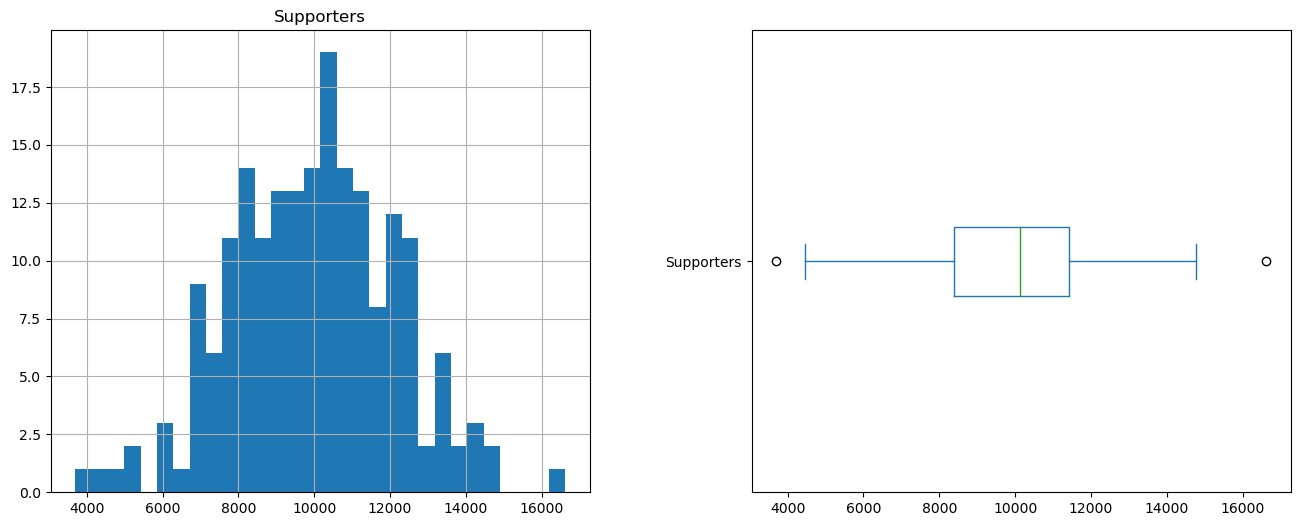

In [9]:
print('Supporters')

print("mean = ", matches['Supporters'].mean(),"\nmedian = ", matches['Supporters'].median(), "\nmax = ", matches['Supporters'].max(), "\nmin = ", matches['Supporters'].min(), "\nrange = ", matches['Supporters'].max() - matches['Supporters'].min(),
      "\nstandard deviation = ", matches['Supporters'].std(), "\n1st quartile = ", matches['Supporters'].quantile(q=0.25), "\n3rd quartile = ", matches['Supporters'].quantile(q=0.75), "\nIQR = ", matches['Supporters'].quantile(q=0.75) - matches['Supporters'].quantile(q=0.25), 
      "\nskewness = ", matches['Supporters'].skew(), "\nkurtosis = ", matches['Supporters'].kurtosis())

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
matches.hist(column='Supporters', bins= 30, ax = ax[0])
matches['Supporters'].plot.box(vert = False, ax = ax[1])
plt.show()

- The least amount of supporters that attended a match is 3695 supporters while the highest is 16,662. On an average, the number of possible supporters present for a match is 9974, as the mean value reveals. 
- The distribution of the data is slighthly negatively skewed with a value of -0.0398. Also, the mean value is lower than that of the median, which is also indicative of a negatively skewed distribution. 
- Although, the Histogram and boxplot resembles a normal distribution the mean value lies to the left of the peak value (median) indicating a negatively skewed distribution.

#4 The numerical variable Temp. and Wind; summary statistics and visualization of distribution

Temp
mean =  10.162176165803107 
median =  10.2 
max =  27.3 
min =  -2.9 
range =  30.2 
standard deviation =  5.412184308542835 
1st quartile =  6.9 
3rd quartile =  13.7 
IQR =  6.799999999999999 
skewness =  -0.03346514892720677 
kurtosis =  0.1294466721089509

Wind
mean =  9.445595854922283 
median =  8.4 
max =  36.4 
min =  0.0 
range =  36.4 
standard deviation =  6.223995382655428 
1st quartile =  4.5 
3rd quartile =  13.2 
IQR =  8.7 
skewness =  0.9515335297050752 
kurtosis =  1.1948833925610498


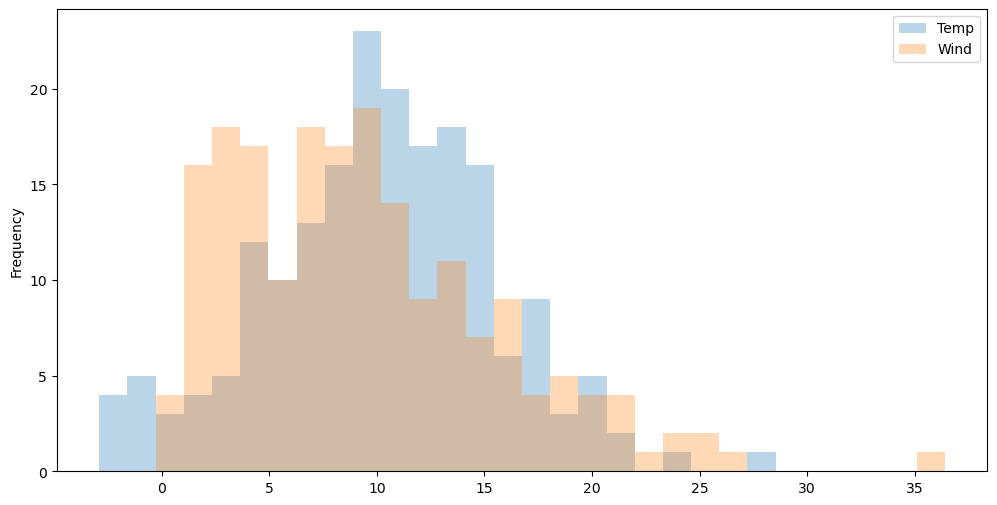

In [10]:
print('Temp')

print("mean = ", matches['Temp'].mean(),"\nmedian = ", matches['Temp'].median(), "\nmax = ", matches['Temp'].max(), "\nmin = ", matches['Temp'].min(), "\nrange = ", matches['Temp'].max() - matches['Temp'].min(),
      "\nstandard deviation = ", matches['Temp'].std(), "\n1st quartile = ", matches['Temp'].quantile(q=0.25), "\n3rd quartile = ", matches['Temp'].quantile(q=0.75), "\nIQR = ", matches['Temp'].quantile(q=0.75) - matches['Temp'].quantile(q=0.25), 
      "\nskewness = ", matches['Temp'].skew(), "\nkurtosis = ", matches['Temp'].kurtosis())

print('\nWind')

print("mean = ", matches['Wind'].mean(),"\nmedian = ", matches['Wind'].median(), "\nmax = ", matches['Wind'].max(), "\nmin = ", matches['Wind'].min(), "\nrange = ", matches['Wind'].max() - matches['Wind'].min(),
      "\nstandard deviation = ", matches['Wind'].std(), "\n1st quartile = ", matches['Wind'].quantile(q=0.25), "\n3rd quartile = ", matches['Wind'].quantile(q=0.75), "\nIQR = ", matches['Wind'].quantile(q=0.75) - matches['Wind'].quantile(q=0.25), 
      "\nskewness = ", matches['Wind'].skew(), "\nkurtosis = ", matches['Wind'].kurtosis())


fig, ax = plt.subplots(1, figsize=(12, 6))
matches[['Temp','Wind']].plot.hist(alpha = 0.3, bins= 30, ax = ax)
plt.show()

#5 Relevant statistics and visualisation of distribution in the variable Results

Lose    96
Win     73
Draw    24
Name: Result, dtype: int64


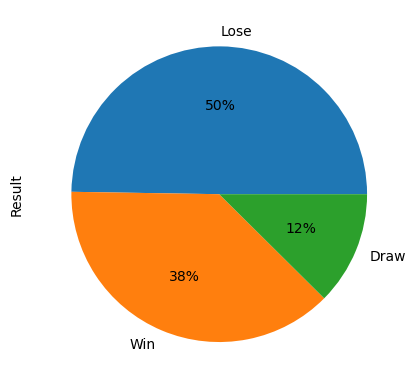

In [11]:
print(matches['Result'].value_counts())
matches['Result'].value_counts().plot.pie(autopct = '%1.0f%%')
plt.show()

- The above code summarises the total amount of lose, win and draws contained in the results column, of all the matches played 50% of the games ended in a lose, whilst 38% ended in a win and 12% ended in a draw

#6 Relevant statistics and visualisation of distribution in the variable Snow

No     173
Yes     20
Name: Snow, dtype: int64


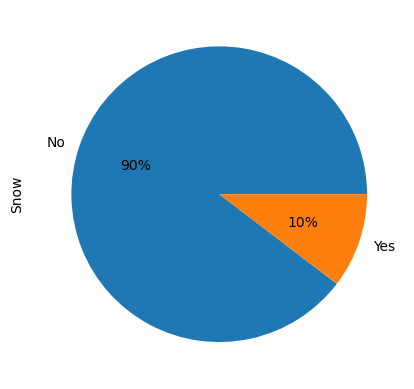

In [12]:
print(matches['Snow'].value_counts())
matches['Snow'].value_counts().plot.pie(autopct = '%1.0f%%')
plt.show()

- The above code summarises the number of times it snowed in the matches dataframe. 90% of the time there was no snow in the games whilst it did snow 10% of the matches played.

#7 The statistics and distribution of Supporters against one of the categorical variables that has a significant effect on the number of supporters.

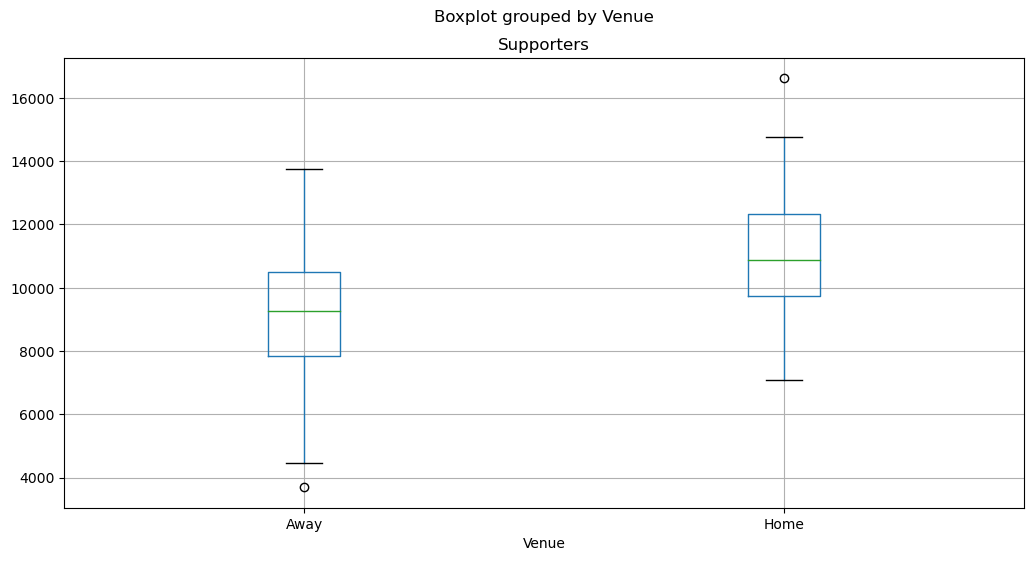

In [13]:
# I will be using the Venue categorical variable to compare with the distribution of Supporters

fig, ax = plt.subplots(1, figsize=(12, 6))
matches.boxplot('Supporters', by = 'Venue', ax = ax)

plt.show()

- From the boxplot we can deduce that there are more supporters present in matches played at Home venues compared to matches played at Away Venues. 
- The boxplot also displays the range, median and skewness of the distribution. The median value for the Away supporters is approximately 9000 while that of the Home supporters is 11000.

#8 The correlation of Supporters against the other numerical variables. Present, and comment upon, a scatterplot of the number of supporters against the variable that has the strongest positive correlation, and a second scatterplot against the variable that has the strongest negative correlation.


In [14]:
matches[['Supporters','Training']].corrwith(matches['Supporters'])

Supporters    1.000000
Training      0.191748
dtype: float64

In [15]:
matches[['Supporters','Injuries']].corrwith(matches['Supporters'])

Supporters    1.000000
Injuries     -0.094611
dtype: float64

In [16]:
matches[['Supporters','OppPtsDiff']].corrwith(matches['Supporters'])

Supporters    1.000000
OppPtsDiff    0.452058
dtype: float64

In [17]:
matches[['Supporters','RedCards']].corrwith(matches['Supporters'])

Supporters    1.000000
RedCards      0.010278
dtype: float64

In [18]:
matches[['Supporters','Temp']].corrwith(matches['Supporters'])

Supporters    1.000000
Temp          0.313474
dtype: float64

In [19]:
matches[['Supporters','Rain']].corrwith(matches['Supporters'])

Supporters    1.000000
Rain         -0.261135
dtype: float64

In [20]:
matches[['Supporters','Wind']].corrwith(matches['Supporters'])

Supporters    1.000000
Wind         -0.230753
dtype: float64

In [21]:
matches[['Supporters','Possession']].corrwith(matches['Supporters'])

Supporters    1.000000
Possession    0.177086
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


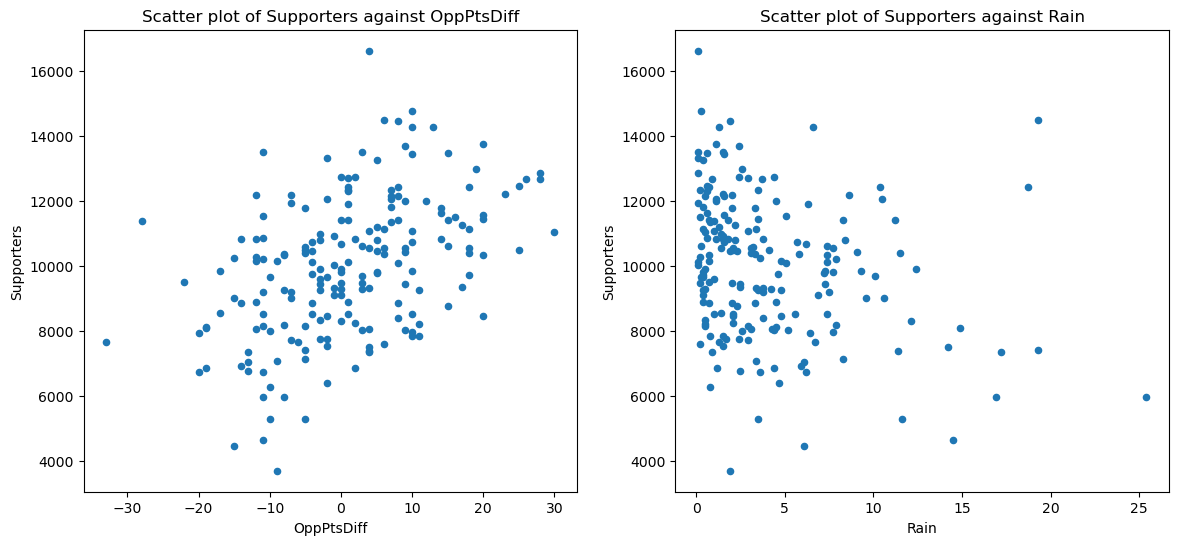

In [22]:
fig, ax = plt.subplots(1,2, figsize=(14, 6))
matches.plot.scatter(y='Supporters', x='OppPtsDiff', ax = ax[0])
ax[0].set_title('Scatter plot of Supporters against OppPtsDiff')
matches.plot.scatter(y='Supporters', x='Rain', ax = ax[1])
ax[1].set_title('Scatter plot of Supporters against Rain')
plt.show()

- I compared the correlation of Supporters to other numerical variable in the matches dataframe. The strongest Positive correlation to the number of Supporters is the OppPtsDiff(Opposition points difference) while the strongest negative correlation is the amount of Rain.
- The positive correlation coefficient of 0.45 is a moderate fit in the relationship between the two datasets. The plot signifies that the more the point difference between opposing teams and their team, the more the amount of supporters present in a game.
- The negative correlation of 0.26 is negligible. However, the plot shows that the lesser the amount of Rain, the more supporters are likely to be present in a game.

#9 The cross-tabulation of Results against a category that has a significant effect on the results. Also show, and comment on, the dependence using appropriate stacked or grouped bar charts. 

Result  Draw  Lose  Win
Venue                  
Away      13    61   33
Home      11    35   40


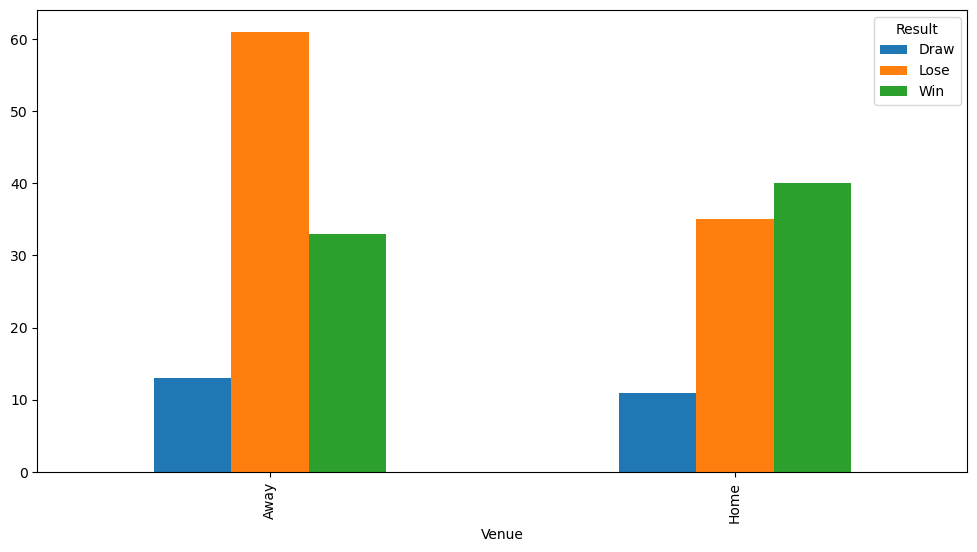

In [23]:
C1 = pd.crosstab(matches['Venue'], matches['Result'])
print(C1)

fig, ax = plt.subplots(1, figsize=(12, 6))
C1.plot.bar(ax = ax)

plt.show()

I examined the crosstabulation of Results as against Venue, the grouped barchart displays the Win, draw and lose proportion at Away and Home venues. The team losses more matches Away compared to them playing at Home Venue.

#10 Create a new data frame called homeMatches that consists of all columns of matches but consists of just the rows that correspond to those where the Venue is Home, and whose opponent team is higher in the league than the team i.e. where OppPtsDiff is greater than zero.


In [24]:
homeMatches = matches[(matches["Venue"] == "Home") & (matches["OppPtsDiff"] > 0)]
homeMatches

,Day,Month,Training,Injuries,OppPtsDiff,RedCards,Venue,Temp,Rain,Wind,Snow,Possession,KickOff,Supporters,Result
5,Wed,Aug,4.50,2,1,0,Home,4.2,7.4,36.4,No,56.2,19:30,8523,Draw
6,Sat,Apr,7.50,2,6,0,Home,14.5,19.3,7.6,No,68.2,19:00,14502,Win
10,Sat,Aug,12.50,2,10,1,Home,6.4,2.1,19.4,No,51.9,12:30,8523,Lose
20,Sat,Aug,11.50,1,7,1,Home,14.9,0.8,6.0,No,54.6,19:00,11357,Lose
23,Wed,Oct,10.50,1,10,1,Home,16.1,1.6,5.6,No,66.7,18:00,10728,Lose
24,Wed,Mar,5.50,2,3,0,Home,11.2,10.1,3.4,No,54.8,17:30,9677,Lose
26,Wed,Dec,4.50,0,7,0,Home,8.3,0.4,6.8,No,46.3,19:30,11798,Lose
32,Sat,Oct,12.25,1,18,1,Home,4.4,0.7,11.0,No,49.7,15:00,12418,Draw
35,Wed,Dec,6.50,0,5,1,Home,9.1,1.3,9.3,No,47.6,18:00,11197,Win
40,Sat,Sep,12.50,0,2,0,Home,17.3,4.4,2.2,No,59.5,15:00,12722,Win


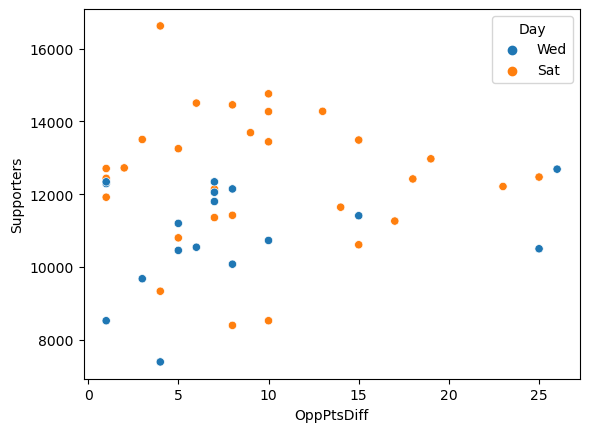

In [25]:
#Creating a scatterplot using the seaborn library that plots Supporters against OppPtsDiff with points coloured by the Day category for the homeMatches dataframe

seaborn.scatterplot(x = 'OppPtsDiff', y = 'Supporters', hue = 'Day', data = homeMatches)
plt.show()

In [26]:
#Creating a new data column in homeMatches dataset called InjuriesPerTrainingHour. Calculated by the formula: InjuriesPerTrainingHour = Injuries / Training

homeMatches['InjuriesPerTraining'] = round (homeMatches['Injuries'] / homeMatches['Training'], 2)
homeMatches

C:\Users\HP\AppData\Local\Temp\ipykernel_18068\3641566367.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homeMatches['InjuriesPerTraining'] = round (homeMatches['Injuries'] / homeMatches['Training'], 2)


,Day,Month,Training,Injuries,OppPtsDiff,RedCards,Venue,Temp,Rain,Wind,Snow,Possession,KickOff,Supporters,Result,InjuriesPerTraining
5,Wed,Aug,4.50,2,1,0,Home,4.2,7.4,36.4,No,56.2,19:30,8523,Draw,0.44
6,Sat,Apr,7.50,2,6,0,Home,14.5,19.3,7.6,No,68.2,19:00,14502,Win,0.27
10,Sat,Aug,12.50,2,10,1,Home,6.4,2.1,19.4,No,51.9,12:30,8523,Lose,0.16
20,Sat,Aug,11.50,1,7,1,Home,14.9,0.8,6.0,No,54.6,19:00,11357,Lose,0.09
23,Wed,Oct,10.50,1,10,1,Home,16.1,1.6,5.6,No,66.7,18:00,10728,Lose,0.10
24,Wed,Mar,5.50,2,3,0,Home,11.2,10.1,3.4,No,54.8,17:30,9677,Lose,0.36
26,Wed,Dec,4.50,0,7,0,Home,8.3,0.4,6.8,No,46.3,19:30,11798,Lose,0.00
32,Sat,Oct,12.25,1,18,1,Home,4.4,0.7,11.0,No,49.7,15:00,12418,Draw,0.08
35,Wed,Dec,6.50,0,5,1,Home,9.1,1.3,9.3,No,47.6,18:00,11197,Win,0.00
40,Sat,Sep,12.50,0,2,0,Home,17.3,4.4,2.2,No,59.5,15:00,12722,Win,0.00


In [27]:
#Transforming Kickoff column in homeMatches df to a datetime col. incorporating the Month col.

Newtime = homeMatches['Month'].str.cat(homeMatches['KickOff'], sep = " ")

homeMatches['KickOff'] = pd.to_datetime(Newtime, format = '%b %H:%M')
homeMatches.head()



C:\Users\HP\AppData\Local\Temp\ipykernel_18068\229212604.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homeMatches['KickOff'] = pd.to_datetime(Newtime, format = '%b %H:%M')


,Day,Month,Training,Injuries,OppPtsDiff,RedCards,Venue,Temp,Rain,Wind,Snow,Possession,KickOff,Supporters,Result,InjuriesPerTraining
5,Wed,Aug,4.5,2,1,0,Home,4.2,7.4,36.4,No,56.2,1900-08-01 19:30:00,8523,Draw,0.44
6,Sat,Apr,7.5,2,6,0,Home,14.5,19.3,7.6,No,68.2,1900-04-01 19:00:00,14502,Win,0.27
10,Sat,Aug,12.5,2,10,1,Home,6.4,2.1,19.4,No,51.9,1900-08-01 12:30:00,8523,Lose,0.16
20,Sat,Aug,11.5,1,7,1,Home,14.9,0.8,6.0,No,54.6,1900-08-01 19:00:00,11357,Lose,0.09
23,Wed,Oct,10.5,1,10,1,Home,16.1,1.6,5.6,No,66.7,1900-10-01 18:00:00,10728,Lose,0.10


In [28]:
result = homeMatches.dtypes
print(result)

Day                            object
Month                          object
Training                      float64
Injuries                        int64
OppPtsDiff                      int64
RedCards                        int64
Venue                          object
Temp                          float64
Rain                          float64
Wind                          float64
Snow                           object
Possession                    float64
KickOff                datetime64[ns]
Supporters                      int64
Result                         object
InjuriesPerTraining           float64
dtype: object


In [29]:
matches.head()

,Day,Month,Training,Injuries,OppPtsDiff,RedCards,Venue,Temp,Rain,Wind,Snow,Possession,KickOff,Supporters,Result
0,Sat,Jan,4.00,0,-11,0,Home,3.3,0.6,8.0,No,45.6,12:30,10845,Win
1,Wed,Jan,4.75,1,-19,0,Away,8.4,4.4,1.7,No,36.0,18:00,6846,Lose
2,Sat,Mar,14.75,1,20,1,Away,12.6,3.5,5.8,No,54.2,12:30,11456,Draw
3,Sat,Sep,13.50,1,20,1,Away,5.6,0.7,18.0,No,36.1,19:00,10336,Draw
4,Wed,Apr,8.25,2,11,0,Away,12.1,4.8,9.8,No,46.5,17:30,9266,Lose


In [77]:
#Data Modelling task
#Creating a linear Regression model to predict supporters based on variables with influence on Supporters
#Oppptsdiff, Rain, Venue, Kickoff, Snow, Wind, Temp and Day are the variables I am applying to predict Supporters

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

y = matches['Supporters']
X = matches[['Day', 'OppPtsDiff', 'Venue', 'Rain', 'Wind', 'Temp', 'Snow', 'KickOff']]
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

X.head()
lr = LinearRegression()
model = lr.fit(X_train,y_train)

import sklearn.metrics as metrics
y_pred = model.predict(X_test)
print("R^2(test) = ", metrics.r2_score(y_test, y_pred))
print("MSE(test) = ", metrics.mean_squared_error(y_test, y_pred))
print("MAE(test) = ", metrics.mean_absolute_error(y_test, y_pred))

R^2(test) =  0.5775457725127573
MSE(test) =  1581111.5247772653
MAE(test) =  1003.7927241139265


In [143]:
y_predtrain = model.predict(X_train)
#print("R^2(train) = ", metrics.r2_score(y_train, y_predtrain))
#print("MSE(train) = ", metrics.mean_squared_error(y_train, y_predtrain))
#print("MAE(train) = ", metrics.mean_absolute_error(y_train, y_predtrain))

In [142]:
#Examples of other regression model other than linear regression, so as to compare outputs and accuracy
#Nearest Neighbour Regression

from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors = 4)

model = knn.fit(X_train,y_train)

y_pred = model.predict(X_test)

print("k-Nearest Neighbors")
print("\nR^2 = ", metrics.r2_score(y_test, y_pred))
print("MSE = ", metrics.mean_squared_error(y_test, y_pred))
print("MAE = ", metrics.mean_absolute_error(y_test, y_pred))


k-Nearest Neighbors

R^2 =  0.13105322385216167
MSE =  3252190.823979592
MAE =  1436.4897959183672


In [141]:
y_predtrain = model.predict(X_train)
#print("R^2(train) = ", metrics.r2_score(y_train, y_predtrain))
#print("MSE(train) = ", metrics.mean_squared_error(y_train, y_predtrain))
#print("MAE(train) = ", metrics.mean_absolute_error(y_train, y_predtrain))

In [134]:
#Decision tree model

from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth = 3)
DTmodel = DT.fit(X_train,y_train)

y_pred = DTmodel.predict(X_test)

print("R^2 = ", metrics.r2_score(y_test, y_pred))
print("MSE = ", metrics.mean_squared_error(y_test, y_pred))
print("MAE = ", metrics.mean_absolute_error(y_test, y_pred))

R^2 =  0.16704727886113535
MSE =  3117476.5484552127
MAE =  1400.8334188089825


In [140]:
from sklearn import tree

#plt.figure(figsize = (30,4))
#tree.plot_tree (DT, feature_names = X.columns)
#plt.show()


In [139]:
y_predtrain = DTmodel.predict(X_train)
#print("R^2(train) = ", metrics.r2_score(y_train, y_predtrain))
#print("MSE(train) = ", metrics.mean_squared_error(y_train, y_predtrain))
#print("MAE(train) = ", metrics.mean_absolute_error(y_train, y_predtrain))

In [136]:
# Random Forest Regression Model

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

RFmodel = rf.fit(X_train,y_train)
y_pred = RFmodel.predict(X_test)


print("R^2 = ", metrics.r2_score(y_test, y_pred))
print("MSE = ", metrics.mean_squared_error(y_test, y_pred))
print("MAE = ", metrics.mean_absolute_error(y_test, y_pred))

R^2 =  0.41204546393946073
MSE =  2200526.429904082
MAE =  1168.954081632653


In [138]:
y_predtrain = RFmodel.predict(X_train)
#print("R^2(train) = ", metrics.r2_score(y_train, y_predtrain))
#print("MSE(train) = ", metrics.mean_squared_error(y_train, y_predtrain))
#print("MAE(train) = ", metrics.mean_absolute_error(y_train, y_predtrain))

In comparison to the other models, the linear regression model predicts a greater rate with a lower mean absolute error (MAE) and mean square error (MSE).